In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

In [2]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

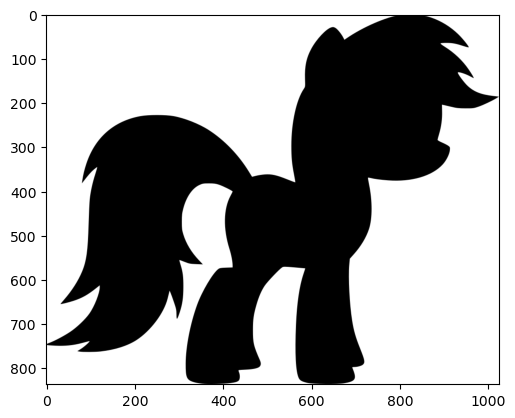

In [3]:
image = plt.imread('pony.png')
plt.imshow(image)

In [4]:
# find top points ("cover")
y = image[:, :, -1].argmax(axis=0).astype(float)
x = np.arange(len(y)).astype(float)

# normalize data
y_max = y.max()
y /= y_max
x = x.reshape(-1, 1)
x_t = StandardScaler().fit_transform(x)

In [7]:
# Create MLP
n_neurons = 10
max_iter = 50

mlp = MLPRegressor(
    hidden_layer_sizes=[n_neurons, n_neurons, n_neurons],
    alpha=0.,
    max_iter=max_iter,
    random_state=42
)

In [8]:
# Animate!
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis([0.5, 1023.5, 836.5, -125.14794233969496])
l, = ax.plot([],[], lw=5)

def animate(i):
    mlp.partial_fit(x_t, y)
    predictions = mlp.predict(x_t)
    l.set_data(x, predictions*y_max)
    

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=max_iter)
plt.close()

HTML(ani.to_jshtml())